<div><img src="page-de-garde.png"></div>

<div style="font-size: 30px;font-family: Times New Roman;color: #e12eb0"><em><strong>Objectifs:</strong></em></div>

<p style="font-size: 17px;font-family: Times New Roman">* Maitriser l’API de twitter pour l’extraction des tweets</p>
<p style="font-size: 17px;font-family: Times New Roman">* Maitriser la partie NLP (natural language processing) avec NLTK en Python</p>
<p style="font-size: 17px;font-family: Times New Roman">* Appliquer les principes de nettoyage des données</p>
<p style="font-size: 17px;font-family: Times New Roman">* Classer les tweets : regrouper ensemble les tweets qui sont similaires. </p>

<div style="font-size: 27px;font-family: Times New Roman;color: #2f8ede"><em><strong>Partie1: Préparation de l'environemet du travail:</strong></em></div>

<div style="font-size: 23px;font-family: Times New Roman;color:  #ff5050"><em><strong>Etape1: Installer la bibliothèque twitter :</strong></em></div>

In [1]:
!pip install tweepy

<div style="font-size: 23px;font-family: Times New Roman;color:  #ff5050"><em><strong>Etape2: Télécharger les Tweets à partir de Twitter en utilisant l’API de twitter</strong></em></div>

In [2]:
consumer_key='AUjiShV8rvaTKzWElqwdWM0Sz'
consumer_secret='sfCUhmtiXLmccz52FhZ86Z3G7T7DSGhABgJfslLnBQrMJzI3Yt'
access_token='1330100727025430536-cErJpNbrbQShojz1iUihhqyytYWaTI'
access_token_secret='U3ChOfIqtWa7q0R7RgiIjHOtxnYVMLkaU2d1aYMhDd6zV'

In [3]:
import tweepy as tw # To consume Twitter's API
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

<div style="font-size: 23px;font-family: Times New Roman;color:  #ff5050"><em><strong>Etape3: Utiliser la bibliothéque NLTK</strong></em></div>

<p style="font-size: 17px;font-family: Times New Roman"><strong>Natural Language Toolkit (NLTK)</strong> est une bibliothèque logicielle en Python permettant un traitement automatique des langues, développée par Steven Bird et Edward Loper du département d'informatique de l'université de Pennsylvanie. En plus de la bibliothèque, NLTK fournit des démonstrations graphiques, des données-échantillon, des tutoriels, ainsi que la documentation de l'interface de programmation (API). </p>

<div style="font-size: 20px;font-family: Times New Roman;color:  #b33c00"><em><strong>1- WordNet :</strong></em></div>

<p style="font-size: 17px;font-family: Times New Roman"><strong>Le WordNet </strong>fait partie de la boîte à outils de langage naturel de Python. C'est une grande base de données de noms anglais, adjectifs, adverbes et verbes. Ceux-ci sont regroupés en un ensemble de synonymes cognitifs, appelés synsets.</p>

<div style="font-size: 20px;font-family: Times New Roman;color:  #b33c00"><em><strong>2- StopWords :</strong></em></div>

<p style="font-size: 17px;font-family: Times New Roman"><strong>Les mots vides</strong> ou <strong>stopwords </strong>sont les mots anglais qui n'ajoutent pas beaucoup de sens à une phrase. Ils peuvent être ignorés en toute sécurité sans sacrifier le sens de la phrase. Par exemple, les mots comme le, il, ont etc. De tels mots sont déjà capturés dans le corpus nommé corpus. Nous le téléchargeons d'abord dans notre environnement python.</p>

<div style="font-size: 27px;font-family: Times New Roman;color: #2f8ede"><em><strong>Partie2: Réalisation du projet:</strong></em></div>

<div style="font-size: 25px;font-family: Times New Roman;color: #b30047"><em><strong>i - Prétraitement des tweets</strong></em></div>

<div style="font-size: 20px;font-family: Times New Roman;color: #e79f82"><strong>1- Importation des package et Exploration de dataset</strong></div>

In [6]:
import re
import nltk
import glob
import string      
import numpy as np 
import pandas as pd
import matplotlib.cm as cm
from nltk.corpus import wordnet
from tweepy import OAuthHandler
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
df = pd.read_csv('combined_csv.csv')
df.head()
df.tail()

,Unnamed: 0,ID,tweet
54559,89,1330569572039024642,RT @Ephemeral_lifee: 2 fav celebreties in sing...
54560,90,1330568755638804487,RT @Ephemeral_lifee: 2 fav celebreties in sing...
54561,91,1330564381633966080,Absolutely true. We only make them celebreties...
54562,92,1330557373719617536,RT @Ephemeral_lifee: 2 fav celebreties in sing...
54563,93,1330557086065856512,RT @Ephemeral_lifee: 2 fav celebreties in sing...


<div style="font-size: 20px;font-family: Times New Roman;color: #993366"><strong>Démonstration d'obtention du dataset concaténée :</strong></div>

<p style="font-size: 17px;font-family: Times New Roman">Pour créer cette dataset, on a passer par plusieurs d'autres étapes comme suit :</p>
<p style="font-size: 17px;font-family: Times New Roman; color:#004d00">1- On a fixé notre recherche sur des thèmes différents (10 thèmes) chacune à 1000 tweets, donc de cette façon, on a réussi à collecter 10000 tweets</p>

In [6]:
search_words1 = "gaming"
search_words2 = "art"
search_words3 = "sports"
search_words4 = "news"
search_words5 = "fashion"
search_words6 = "politics"
search_words7 = "celebreties"
search_words8 = "music"
search_words9 = "instagram"
search_words10 = "computer science"
date_since = "2020-10-01"

<p style="font-size: 17px;font-family: Times New Roman; color:#004d00">2- Pour chaque thème on a crée une dataSet</p>
<p style="font-size: 17px;font-family: Times New Roman">Voici les exemples de réalisation des  datasets pour collercter 1000 tweets du words1 jusqu'à word10</p>

<p style="font-size: 19px;font-family: Times New Roman; color:#802b00">Exemple 1:</p>

<p style="font-size: 17px;font-family: Times New Roman; color:#990000">2.1- collecter des tweets:</p>

In [8]:
#tweets=[]
#for tweet in tw.Cursor(api.search,
 #             q=search_words1,
 #             lang="en",
#            since=date_since).items(1000):
#    tweets.append(tweet)
# Iterate and print tweets
#for tweet in tweets:
 #   print(tweet.text)

<p style="font-size: 17px;font-family: Times New Roman; color:#990000">2.2- Convertir du text au csv :</p>

In [10]:
#def ToDataframeTweets(tweets):
#    TweetsDF = pd.DataFrame()
#    TweetsDF['ID'] = [tweet.id for tweet in tweets]
#    TweetsDF['tweet'] = [tweet.text for tweet in tweets]
#    TweetsDF.to_csv('tweets.csv')
    
 #   return TweetsDF

<p style="font-size: 17px;font-family: Times New Roman; color:#990000">2.3- Affichage des 10 premières lignes:</p>

In [12]:
#TweetsDF = ToDataframeTweets(tweets)
#TweetsDF.head(10)

<p style="font-size: 19px;font-family: Times New Roman; color:#802b00">Exemple 2:</p>

In [ ]:
#tweets=[]
#for tweet in tw.Cursor(api.search,
 #             q=search_words2,
 #             lang="en",
#            since=date_since).items(1000):
#    tweets.append(tweet)
# Iterate and print tweets
#for tweet in tweets:
 #   print(tweet.text)
    
#def ToDataframeTweets(tweets):
#    TweetsDF = pd.DataFrame()
#    TweetsDF['ID'] = [tweet.id for tweet in tweets]
#    TweetsDF['tweet'] = [tweet.text for tweet in tweets]
#    TweetsDF.to_csv('tweets2.csv')
    
 #   return TweetsDF

#TweetsDF = ToDataframeTweets(tweets)
#TweetsDF.head(10)

<p style="font-size: 19px;font-family: Times New Roman; color:#802b00">Exemple 3:</p>

In [ ]:
#tweets=[]
#for tweet in tw.Cursor(api.search,
 #             q=search_words3,
 #             lang="en",
#            since=date_since).items(1000):
#    tweets.append(tweet)
# Iterate and print tweets
#for tweet in tweets:
 #   print(tweet.text)
    
#def ToDataframeTweets(tweets):
#    TweetsDF = pd.DataFrame()
#    TweetsDF['ID'] = [tweet.id for tweet in tweets]
#    TweetsDF['tweet'] = [tweet.text for tweet in tweets]
#    TweetsDF.to_csv('tweets3.csv')
    
 #   return TweetsDF

#TweetsDF = ToDataframeTweets(tweets)
#TweetsDF.head(10)

<p style="font-size: 19px;font-family: Times New Roman; color:#802b00">Exemple 4:</p>

In [ ]:
#tweets=[]
#for tweet in tw.Cursor(api.search,
 #             q=search_words4,
 #             lang="en",
#            since=date_since).items(1000):
#    tweets.append(tweet)
# Iterate and print tweets
#for tweet in tweets:
 #   print(tweet.text)
    
#def ToDataframeTweets(tweets):
#    TweetsDF = pd.DataFrame()
#    TweetsDF['ID'] = [tweet.id for tweet in tweets]
#    TweetsDF['tweet'] = [tweet.text for tweet in tweets]
#    TweetsDF.to_csv('tweets4.csv')
    
 #   return TweetsDF

#TweetsDF = ToDataframeTweets(tweets)
#TweetsDF.head(10)

<p style="font-size: 19px;font-family: Times New Roman; color:#802b00">Exemple 5:</p>

In [ ]:
#tweets=[]
#for tweet in tw.Cursor(api.search,
 #             q=search_words5,
 #             lang="en",
#            since=date_since).items(1000):
#    tweets.append(tweet)
# Iterate and print tweets
#for tweet in tweets:
 #   print(tweet.text)
    
#def ToDataframeTweets(tweets):
#    TweetsDF = pd.DataFrame()
#    TweetsDF['ID'] = [tweet.id for tweet in tweets]
#    TweetsDF['tweet'] = [tweet.text for tweet in tweets]
#    TweetsDF.to_csv('tweets5.csv')
    
 #   return TweetsDF

#TweetsDF = ToDataframeTweets(tweets)
#TweetsDF.head(10)

<p style="font-size: 19px;font-family: Times New Roman; color:#802b00">Exemple 6:</p>

In [ ]:
#tweets=[]
#for tweet in tw.Cursor(api.search,
 #             q=search_words6,
 #             lang="en",
#            since=date_since).items(1000):
#    tweets.append(tweet)
# Iterate and print tweets
#for tweet in tweets:
 #   print(tweet.text)
    
#def ToDataframeTweets(tweets):
#    TweetsDF = pd.DataFrame()
#    TweetsDF['ID'] = [tweet.id for tweet in tweets]
#    TweetsDF['tweet'] = [tweet.text for tweet in tweets]
#    TweetsDF.to_csv('tweets6.csv')
    
 #   return TweetsDF

#TweetsDF = ToDataframeTweets(tweets)
#TweetsDF.head(10)

<p style="font-size: 19px;font-family: Times New Roman; color:#802b00">Exemple 7:</p>

In [ ]:
#tweets=[]
#for tweet in tw.Cursor(api.search,
 #             q=search_words7,
 #             lang="en",
#            since=date_since).items(1000):
#    tweets.append(tweet)
# Iterate and print tweets
#for tweet in tweets:
 #   print(tweet.text)
    
#def ToDataframeTweets(tweets):
#    TweetsDF = pd.DataFrame()
#    TweetsDF['ID'] = [tweet.id for tweet in tweets]
#    TweetsDF['tweet'] = [tweet.text for tweet in tweets]
#    TweetsDF.to_csv('tweets7.csv')
    
 #   return TweetsDF

#TweetsDF = ToDataframeTweets(tweets)
#TweetsDF.head(10)

<p style="font-size: 19px;font-family: Times New Roman; color:#802b00">Exemple 8</p>

In [ ]:
#tweets=[]
#for tweet in tw.Cursor(api.search,
 #             q=search_words8,
 #             lang="en",
#            since=date_since).items(1000):
#    tweets.append(tweet)
# Iterate and print tweets
#for tweet in tweets:
 #   print(tweet.text)
    
#def ToDataframeTweets(tweets):
#    TweetsDF = pd.DataFrame()
#    TweetsDF['ID'] = [tweet.id for tweet in tweets]
#    TweetsDF['tweet'] = [tweet.text for tweet in tweets]
#    TweetsDF.to_csv('tweets8.csv')
    
 #   return TweetsDF

#TweetsDF = ToDataframeTweets(tweets)
#TweetsDF.head(10)

<p style="font-size: 19px;font-family: Times New Roman; color:#802b00">Exemple 9:</p>

In [ ]:
#tweets=[]
#for tweet in tw.Cursor(api.search,
 #             q=search_words9,
 #             lang="en",
#            since=date_since).items(1000):
#    tweets.append(tweet)
# Iterate and print tweets
#for tweet in tweets:
 #   print(tweet.text)
    
#def ToDataframeTweets(tweets):
#    TweetsDF = pd.DataFrame()
#    TweetsDF['ID'] = [tweet.id for tweet in tweets]
#    TweetsDF['tweet'] = [tweet.text for tweet in tweets]
#    TweetsDF.to_csv('tweets9.csv')
    
 #   return TweetsDF

#TweetsDF = ToDataframeTweets(tweets)
#TweetsDF.head(10)

<p style="font-size: 19px;font-family: Times New Roman; color:#802b00">Exemple 10:</p>

In [ ]:
#tweets=[]
#for tweet in tw.Cursor(api.search,
 #             q=search_words10,
 #             lang="en",
#            since=date_since).items(1000):
#    tweets.append(tweet)
# Iterate and print tweets
#for tweet in tweets:
 #   print(tweet.text)
    
#def ToDataframeTweets(tweets):
#    TweetsDF = pd.DataFrame()
#    TweetsDF['ID'] = [tweet.id for tweet in tweets]
#    TweetsDF['tweet'] = [tweet.text for tweet in tweets]
#    TweetsDF.to_csv('tweets10.csv')
    
 #   return TweetsDF

#TweetsDF = ToDataframeTweets(tweets)
#TweetsDF.head(10)

<p style="font-size: 17px;font-family: Times New Roman; color:#b3ffff">3- Enfin, on fait la concaténation des 10 dataset obtenues afin de réaliser ue dataset de 10000 tweets .</p>

In [13]:
#extension = 'csv'
#all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#print(all_filenames)

In [14]:
#combine all files in the list
#combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
#combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')
#combined_csv.tail(10000)

<div style="font-size: 20px;font-family: Times New Roman;color: #993366"><strong>Des informations sur la dataset :</strong></div>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54564 entries, 0 to 54563
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  54564 non-null  int64 
 1   ID          54564 non-null  int64 
 2   tweet       54564 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.2+ MB


In [10]:
missing = df.isna().sum()
print(missing)

Unnamed: 0    0
ID            0
tweet         0
dtype: int64


<div style="font-size: 20px;font-family: Times New Roman;color: #993366"><strong>Dropping unnecessary columns :</strong></div>

In [11]:
to_drop= ['ID','Unnamed: 0']
df.drop(to_drop,1,inplace=True)
df.head()

,tweet
0,Math should definitely be abolished from the H...
1,The Submission Plaza Music from the Check Mii ...
2,RT @AudioKitPro: Congrats to @andrewhuang for ...
3,RT @AndrewHulshult: Find someone who has expre...
4,@HBurness No no no. Worth it for the music.😀


<div style="font-size: 20px;font-family: Times New Roman;color: #993366"><strong>Dropping ponctuations :</strong></div>

In [12]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","[","\\","]","^","_",
              "`","{","|","}","~","–","RT","@","<-"]
for char in spec_chars:

    df['tweet'] = df['tweet'].str.replace(char, ' ')

In [13]:
df.tail(3000)

,tweet
51564,NE FCS Week ❤️ Taco ‘Bout It Tuesday Today we...
51565,fashion 60 Blouse Design Idea and Inspirati...
51566,SOCIAL LISTENING ACTIONABLE BUSINESS DECISION...
51567,LAST MILE DELIVERY USING DRONES Talkin dron...
51568,suasgirlfriend WM ONOFF OMG SO PRETTY AND AN...
...,...
54559,Ephemeral lifee 2 fav celebreties in singl...
54560,Ephemeral lifee 2 fav celebreties in singl...
54561,Absolutely true We only make them celebreties...
54562,Ephemeral lifee 2 fav celebreties in singl...


<div style="font-size: 20px;font-family: Times New Roman;color: #993366"><strong>Dropping emoji :</strong></div>

In [14]:
df['tweet'] = df['tweet'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)

In [17]:
df.to_csv('test.csv')

In [18]:
df.tail(10)

,tweet
54554,c00chiecake I dknt like her but i desperately...
54555,jenmish But then how will he feed his own vi...
54556,WOKE The challenges being a conservative in ...
54557,Ephemeral lifee 2 fav celebreties in singl...
54558,Ephemeral lifee 2 fav celebreties in singl...
54559,Ephemeral lifee 2 fav celebreties in singl...
54560,Ephemeral lifee 2 fav celebreties in singl...
54561,Absolutely true We only make them celebreties...
54562,Ephemeral lifee 2 fav celebreties in singl...
54563,Ephemeral lifee 2 fav celebreties in singl...


<div style="font-size: 20px;font-family: Times New Roman;color: #993366"><strong>Dropping URL :</strong></div>

In [19]:
def replace_urls(in_string, replacement=None):
    """Replace URLs in strings. See also: ``bit.ly/PyURLre``

    Args:
        in_string (str): string to filter
        replacement (str or None): replacment text. defaults to '<-URL->'

    Returns:
        str
    """
    replacement = '<-URL->' if replacement is None else replacement
    pattern = re.compile('(https?://)?(\w*[.]\w+)+([/?=&]+\w+)*')
    return re.sub(pattern, replacement, in_string)

<div style="font-size: 20px;font-family: Times New Roman;color: #993366"><strong>Dropping duplicates :</strong></div>

In [20]:
df.drop_duplicates()

,tweet
0,Math should definitely be abolished from the H...
1,The Submission Plaza Music from the Check Mii ...
2,AudioKitPro Congrats to andrewhuang for t...
3,AndrewHulshult Find someone who has expres...
4,HBurness No no no Worth it for the music
...,...
54084,c00chiecake I dknt like her but i desperately...
54085,jenmish But then how will he feed his own vi...
54086,WOKE The challenges being a conservative in ...
54087,Ephemeral lifee 2 fav celebreties in singl...


<div style="font-size: 20px;font-family: Times New Roman;color: #993366"><strong>DataSet Size :</strong></div>

In [21]:
print('Dataset size:',df.shape)
print('Columns are:',df.columns)

Dataset size: (54564, 1)
Columns are: Index(['tweet'], dtype='object')


<div style="font-size: 25px;font-family: Times New Roman;color: #b30047"><em><strong>ii- Traitement des tweets : NLP (Natural LanguageProcessing)</strong></em></div>

<p style="font-size: 17px;font-family: Times New Roman"><strong>Le traitement du langage naturel (NLP)</strong> consiste à développer des applications et des services capables de comprendre les langues humaines. Certains exemples pratiques de la NLP sont la reconnaissance vocale, par exemple: la recherche vocale sur Google, la compréhension du contenu ou l'analyse des sentiments, etc.

(-0.5, 399.5, 199.5, -0.5)

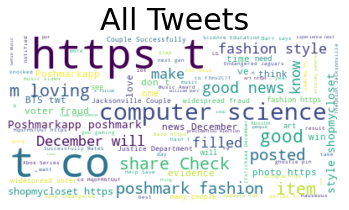

In [22]:
tweet_All = " ".join(review for review in df.tweet)

# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)

# Display the generated image:
plt.imshow(wordcloud_ALL, interpolation='bilinear')
plt.title('All Tweets', fontsize=30,loc='center')
plt.axis('off')

<div style="font-size: 20px;font-family: Times New Roman;color: #0052cc"><strong>Remarque :</strong></div>

<p style="font-size: 17px;font-family: Times New Roman"><strong>Word Cloud </strong>est une technique de visualisation de données utilisée pour représenter des données textuelles dans laquelle la taille de chaque mot indique sa fréquence ou son importance. Des points de données textuelles importants peuvent être mis en évidence à l'aide d'un nuage de mots. Les nuages de mots sont largement utilisés pour analyser les données des sites Web de réseaux sociaux.</p>

<p style="font-size: 17px;font-family: Times New Roman">Pour onvertir du wordCloud au text on utilise la comande suivante : <stong>wordcloud.to_file("img/first_review.png")</strong></p>

<div style="font-size: 20px;font-family: Times New Roman;color: #993366"><strong>Tokenization :</strong></div>

<p style="font-size: 17px;font-family: Times New Roman">En Python, <strong>la tokenisation </strong>se réfère essentiellement à la division d'un plus grand corps de texte en lignes, mots plus petits ou même à la création de mots pour une langue non anglaise. Les diverses fonctions de tokenisation intégrées dans le module nltk lui-même et peuvent être utilisées dans les programmes.</p>

In [23]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['Tweet_tokenized'] = df['tweet'].apply(lambda x: tokenization(x.lower()))
df.head()

,tweet,Tweet_tokenized
0,Math should definitely be abolished from the H...,"[math, should, definitely, be, abolished, from..."
1,The Submission Plaza Music from the Check Mii ...,"[the, submission, plaza, music, from, the, che..."
2,AudioKitPro Congrats to andrewhuang for t...,"[, audiokitpro, congrats, to, andrewhuang, for..."
3,AndrewHulshult Find someone who has expres...,"[, andrewhulshult, find, someone, who, has, ex..."
4,HBurness No no no Worth it for the music,"[, hburness, no, no, no, worth, it, for, the, ..."


<div style="font-size: 20px;font-family: Times New Roman;color: #993366"><strong>Remove stopwords :</strong></div>

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
stopword = nltk.corpus.stopwords.words('english')

In [26]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df.head(10)

,tweet,Tweet_tokenized,Tweet_nonstop
0,Math should definitely be abolished from the H...,"[math, should, definitely, be, abolished, from...","[math, definitely, abolished, hs, curriculum, ..."
1,The Submission Plaza Music from the Check Mii ...,"[the, submission, plaza, music, from, the, che...","[submission, plaza, music, check, mii, channel..."
2,AudioKitPro Congrats to andrewhuang for t...,"[, audiokitpro, congrats, to, andrewhuang, for...","[, audiokitpro, congrats, andrewhuang, killer,..."
3,AndrewHulshult Find someone who has expres...,"[, andrewhulshult, find, someone, who, has, ex...","[, andrewhulshult, find, someone, expressed, i..."
4,HBurness No no no Worth it for the music,"[, hburness, no, no, no, worth, it, for, the, ...","[, hburness, worth, music, ]"
5,kailanidi Can we drive and listen to RNB m...,"[, kailanidi, can, we, drive, and, listen, to,...","[, kailanidi, drive, listen, rnb, music, toget..."
6,ive been a fan of more than one artist that h...,"[ive, been, a, fan, of, more, than, one, artis...","[ive, fan, one, artist, taken, decisions, atte..."
7,Xanadu419 isent scars speed build music reall...,"[, xanadu419, isent, scars, speed, build, musi...","[, xanadu419, isent, scars, speed, build, musi..."
8,DailyofJK Q The technique trick u apply t...,"[, dailyofjk, q, the, technique, trick, u, app...","[, dailyofjk, q, technique, trick, u, apply, u..."
9,There is this My Family song that comes up a...,"[there, is, this, my, family, song, that, come...","[family, song, comes, almost, every, time, tun..."


<div style="font-size: 20px;font-family: Times New Roman;color: #993366"><strong>Stemming and Lemmatization :</strong></div>

<p style="font-size: 17px;font-family: Times New Roman"><strong>Stemming</strong> et <strong>Lemmatization</strong> sont des techniques de normalisation de texte (ou parfois appelées normalisation de mots) dans le domaine du traitement du langage naturel qui sont utilisées pour préparer du texte, des mots et des documents pour un traitement ultérieur</p>

<div style="font-size: 20px;font-family: Times New Roman;color: #ff6600"><strong>* Stemming :</strong></div>

<p style="font-size: 17px;font-family: Times New Roman">En Python, <strong>Stemming </strong>est le processus de réduction de l'inflexion des mots à leurs formes fondamentales, comme la mise en correspondance d'un groupe de mots avec la même racine, même si la racine elle-même n'est pas un mot valide dans la langue.</p>

In [27]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['Tweet_stemmed'] = df['Tweet_nonstop'].apply(lambda x: stemming(x))
df.head()

,tweet,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed
0,Math should definitely be abolished from the H...,"[math, should, definitely, be, abolished, from...","[math, definitely, abolished, hs, curriculum, ...","[math, definit, abolish, hs, curriculum, point..."
1,The Submission Plaza Music from the Check Mii ...,"[the, submission, plaza, music, from, the, che...","[submission, plaza, music, check, mii, channel...","[submiss, plaza, music, check, mii, channel, s..."
2,AudioKitPro Congrats to andrewhuang for t...,"[, audiokitpro, congrats, to, andrewhuang, for...","[, audiokitpro, congrats, andrewhuang, killer,...","[, audiokitpro, congrat, andrewhuang, killer, ..."
3,AndrewHulshult Find someone who has expres...,"[, andrewhulshult, find, someone, who, has, ex...","[, andrewhulshult, find, someone, expressed, i...","[, andrewhulshult, find, someon, express, inte..."
4,HBurness No no no Worth it for the music,"[, hburness, no, no, no, worth, it, for, the, ...","[, hburness, worth, music, ]","[, hbur, worth, music, ]"


<div style="font-size: 20px;font-family: Times New Roman;color: #ff6600"><strong>* Lemmatization :</strong></div>

<p style="font-size: 17px;font-family: Times New Roman">En Python, <strong>Lemmatization </strong>contrairement au Stemming, réduit correctement les mots fléchis en s'assurant que le mot racine appartient à la langue. Dans la lemmatisation, le mot racine est appelé Lemme. Un lemme (lemme pluriel ou lemmata) est la forme canonique, la forme du dictionnaire ou la forme de citation d'un ensemble de mots.</p>

In [28]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['Tweet_lemmatized'] = df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
df.head()

,tweet,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,Math should definitely be abolished from the H...,"[math, should, definitely, be, abolished, from...","[math, definitely, abolished, hs, curriculum, ...","[math, definit, abolish, hs, curriculum, point...","[math, definitely, abolished, h, curriculum, p..."
1,The Submission Plaza Music from the Check Mii ...,"[the, submission, plaza, music, from, the, che...","[submission, plaza, music, check, mii, channel...","[submiss, plaza, music, check, mii, channel, s...","[submission, plaza, music, check, mii, channel..."
2,AudioKitPro Congrats to andrewhuang for t...,"[, audiokitpro, congrats, to, andrewhuang, for...","[, audiokitpro, congrats, andrewhuang, killer,...","[, audiokitpro, congrat, andrewhuang, killer, ...","[, audiokitpro, congrats, andrewhuang, killer,..."
3,AndrewHulshult Find someone who has expres...,"[, andrewhulshult, find, someone, who, has, ex...","[, andrewhulshult, find, someone, expressed, i...","[, andrewhulshult, find, someon, express, inte...","[, andrewhulshult, find, someone, expressed, i..."
4,HBurness No no no Worth it for the music,"[, hburness, no, no, no, worth, it, for, the, ...","[, hburness, worth, music, ]","[, hbur, worth, music, ]","[, hburness, worth, music, ]"


<div style="font-size: 20px;font-family: Times New Roman;color: #993366"><strong>Vectorization :</strong></div>

<p style="font-size: 17px;font-family: Times New Roman"><strong>Vectorization </strong>est utilisée pour accélérer le code Python sans utiliser de boucle. L'utilisation d'une telle fonction peut aider à minimiser efficacement le temps d'exécution du code. Diverses opérations sont effectuées sur un vecteur tel que le produit scalaire des vecteurs qui est également connu sous le nom de produit scalaire car il produit une sortie unique, des produits externes qui se traduisent par une matrice carrée de dimension égale à la longueur X longueur des vecteurs, la multiplication par élément qui produit le élément de même index et dimension de la matrice restent inchangés.</p>

In [29]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [30]:
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(df['tweet'])
print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

54564 Number of tweets has 20784 words


In [31]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aa,aaa,aaaaaaaaaaaaaaaaaaaaa,aaawwww,aagfnfiu,aagmd,aahwchrmt,aakmqdno,aaljdqid,...,𝗚𝗜𝗩𝗘𝗔𝗪𝗔𝗬,𝗜𝗻𝘀𝗽𝗶𝗿𝗮𝘁𝗶𝗼𝗻𝗮𝗹,𝗜𝗻𝘀𝘁𝗮𝗴𝗿𝗮𝗺,𝗠𝗜,𝗣𝗼𝘀𝘁,𝗦𝗢𝗠𝗘,𝗩𝗢𝗧𝗘,𝗴𝗮𝗺𝗲𝗱𝗮𝘆,𝘐𝘯𝘵𝘳𝘰𝘥𝘶𝘤𝘵𝘪𝘰𝘯,𝘛𝘸𝘦𝘦𝘵
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<div style="font-size: 25px;font-family: Times New Roman;color: #b30047"><em><strong>iii - Classification des tweets</strong></em></div>

<p style="font-size: 17px;font-family: Times New Roman">Dans notre projet on s'intéresse à faire la classification à l'aide de kmeans</p>

<div style="font-size: 20px;font-family: Times New Roman;color: #0052cc"><strong>Définition de k-means :</strong></div>

<p style="font-size: 17px;font-family: Times New Roman"><strong>K-means</strong> est un algorithme non supervisé de clustering non hiérarchique. Il permet de regrouper en K clusters distincts les observations du data set. Ainsi les données similaires se retrouveront dans un même cluster. Par ailleurs, une observation ne peut se retrouver que dans un cluster à la fois (exclusivité d’appartenance). Une même observation, ne pourra donc, appartenir à deux clusters différents.</p>

<p style="font-size: 17px;font-family: Times New Roman">Ici, nous traçons les clusters générés par notre opération KMeans. Un graphique utilise PCA qui est meilleur pour capturer la structure globale des données. L'autre utilise TSNE qui est meilleur pour capturer les relations entre voisins. </p>

Initialization complete
Iteration  0, inertia 1343790.000
Iteration  1, inertia 663574.589
Iteration  2, inertia 663277.731
Converged at iteration 2: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 1367952.000
Iteration  1, inertia 664202.442
Iteration  2, inertia 663280.948
Iteration  3, inertia 663277.731
Converged at iteration 3: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 1243476.000
Iteration  1, inertia 663801.618
Iteration  2, inertia 663277.731
Converged at iteration 2: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 1024794.000
Iteration  1, inertia 700573.891
Iteration  2, inertia 700457.040
Iteration  3, inertia 700395.309
Converged at iteration 3: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 1399416.000
Iteration  1, inertia 697656.334
Iteration  2, inert

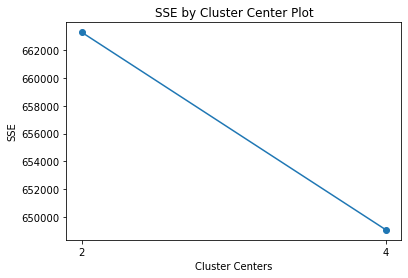

In [47]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(KMeans(n_clusters=k,init='k-means++',max_iter=300,
                          n_init=10,random_state=0,verbose=True).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(countVector, 5)

In [48]:
clusters = KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0,verbose=True).fit_predict(countVector)

Initialization complete
Iteration  0, inertia 1196478.000
Iteration  1, inertia 655467.418
Iteration  2, inertia 650109.080
Iteration  3, inertia 646676.356
Iteration  4, inertia 645900.856
Iteration  5, inertia 645870.412
Iteration  6, inertia 645869.217
Iteration  7, inertia 645868.857
Converged at iteration 7: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 1201482.000
Iteration  1, inertia 654288.169
Iteration  2, inertia 652293.525
Iteration  3, inertia 652078.894
Iteration  4, inertia 651135.363
Iteration  5, inertia 649146.112
Iteration  6, inertia 648509.913
Iteration  7, inertia 648226.785
Iteration  8, inertia 648139.155
Iteration  9, inertia 648067.728
Iteration 10, inertia 647694.904
Iteration 11, inertia 647512.725
Converged at iteration 11: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 973122.000
Iteration  1, inertia 684815.456
Iteration  2, inertia 684794.648
Co

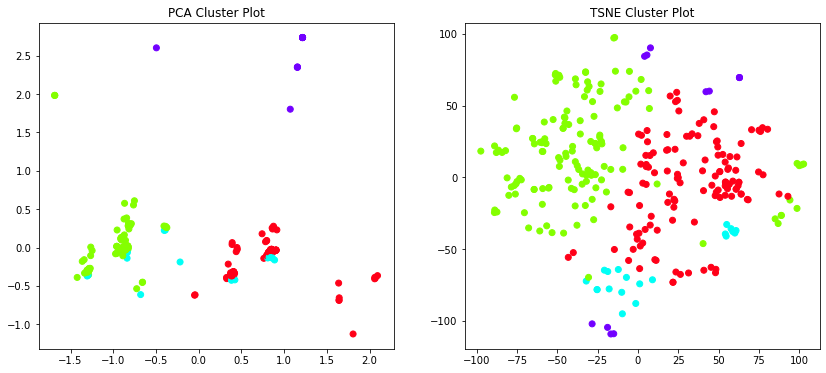

In [49]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.cm as cm
import numpy as np


def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=8000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(countVector, clusters)

Initialization complete
Iteration  0, inertia 1343790.000
Iteration  1, inertia 663574.589
Iteration  2, inertia 663277.731
Converged at iteration 2: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 1367952.000
Iteration  1, inertia 664202.442
Iteration  2, inertia 663280.948
Iteration  3, inertia 663277.731
Converged at iteration 3: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 1243476.000
Iteration  1, inertia 663801.618
Iteration  2, inertia 663277.731
Converged at iteration 2: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 1024794.000
Iteration  1, inertia 700573.891
Iteration  2, inertia 700457.040
Iteration  3, inertia 700395.309
Converged at iteration 3: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 1399416.000
Iteration  1, inertia 697656.334
Iteration  2, inert

Iteration  3, inertia 641148.143
Iteration  4, inertia 639567.451
Iteration  5, inertia 639567.292
Converged at iteration 5: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 1026534.000
Iteration  1, inertia 664944.966
Iteration  2, inertia 663500.573
Iteration  3, inertia 657576.449
Iteration  4, inertia 655618.067
Iteration  5, inertia 655596.366
Iteration  6, inertia 655595.743
Converged at iteration 6: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 819528.000
Iteration  1, inertia 669660.991
Iteration  2, inertia 662294.130
Iteration  3, inertia 661323.521
Iteration  4, inertia 661302.783
Converged at iteration 4: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 889350.000
Iteration  1, inertia 684377.423
Iteration  2, inertia 656019.875
Iteration  3, inertia 651375.136
Iteration  4, inertia 651330.283
Iteration  5, inertia

Iteration  0, inertia 1008282.000
Iteration  1, inertia 634810.497
Iteration  2, inertia 633068.269
Iteration  3, inertia 632284.573
Iteration  4, inertia 631754.835
Iteration  5, inertia 630357.245
Iteration  6, inertia 630137.806
Iteration  7, inertia 630131.503
Iteration  8, inertia 630129.892
Converged at iteration 8: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 888012.000
Iteration  1, inertia 666329.124
Iteration  2, inertia 640488.809
Iteration  3, inertia 638806.787
Iteration  4, inertia 638460.288
Iteration  5, inertia 637805.601
Iteration  6, inertia 636857.824
Iteration  7, inertia 635058.700
Iteration  8, inertia 633775.385
Iteration  9, inertia 633232.715
Iteration 10, inertia 633185.968
Iteration 11, inertia 633185.646
Converged at iteration 11: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 801372.000
Iteration  1, inertia 654106.980
Iteration  2, inertia 63831

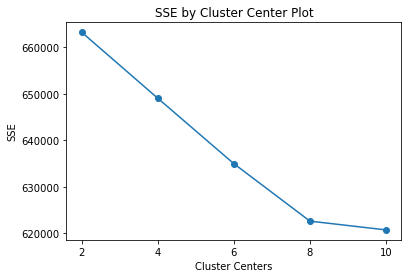

In [50]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(KMeans(n_clusters=k,init='k-means++',max_iter=300,
                          n_init=10,random_state=0,verbose=True).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(countVector, 10)

In [51]:
clusters = KMeans(n_clusters=10,init='k-means++',max_iter=300,n_init=10,random_state=0,verbose=True).fit_predict(countVector)

Initialization complete
Iteration  0, inertia 885708.000
Iteration  1, inertia 654505.155
Iteration  2, inertia 645696.182
Iteration  3, inertia 625581.519
Iteration  4, inertia 624814.024
Iteration  5, inertia 624755.986
Iteration  6, inertia 624658.332
Iteration  7, inertia 624552.756
Iteration  8, inertia 624467.772
Iteration  9, inertia 623941.471
Iteration 10, inertia 623652.251
Iteration 11, inertia 623645.010
Iteration 12, inertia 623644.720
Converged at iteration 12: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 833292.000
Iteration  1, inertia 650590.354
Iteration  2, inertia 649337.476
Iteration  3, inertia 649063.271
Iteration  4, inertia 648830.903
Iteration  5, inertia 648748.214
Iteration  6, inertia 648731.132
Iteration  7, inertia 648669.918
Iteration  8, inertia 647923.886
Iteration  9, inertia 646818.256
Iteration 10, inertia 646813.664
Iteration 11, inertia 646812.531
Converged at iteration 11: center shift 0.00

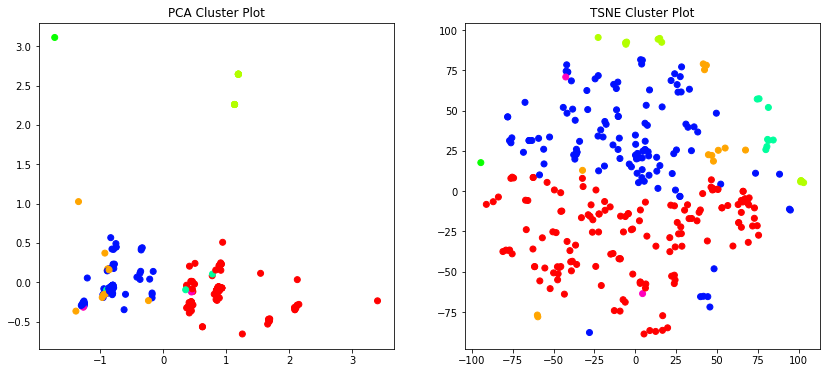

In [52]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.cm as cm
import numpy as np


def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=8000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(countVector, clusters)

Initialization complete
Iteration  0, inertia 1343790.000
Iteration  1, inertia 663574.589
Iteration  2, inertia 663277.731
Converged at iteration 2: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 1367952.000
Iteration  1, inertia 664202.442
Iteration  2, inertia 663280.948
Iteration  3, inertia 663277.731
Converged at iteration 3: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 1243476.000
Iteration  1, inertia 663801.618
Iteration  2, inertia 663277.731
Converged at iteration 2: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 1024794.000
Iteration  1, inertia 700573.891
Iteration  2, inertia 700457.040
Iteration  3, inertia 700395.309
Converged at iteration 3: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 1399416.000
Iteration  1, inertia 697656.334
Iteration  2, inert

Iteration  3, inertia 641148.143
Iteration  4, inertia 639567.451
Iteration  5, inertia 639567.292
Converged at iteration 5: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 1026534.000
Iteration  1, inertia 664944.966
Iteration  2, inertia 663500.573
Iteration  3, inertia 657576.449
Iteration  4, inertia 655618.067
Iteration  5, inertia 655596.366
Iteration  6, inertia 655595.743
Converged at iteration 6: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 819528.000
Iteration  1, inertia 669660.991
Iteration  2, inertia 662294.130
Iteration  3, inertia 661323.521
Iteration  4, inertia 661302.783
Converged at iteration 4: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 889350.000
Iteration  1, inertia 684377.423
Iteration  2, inertia 656019.875
Iteration  3, inertia 651375.136
Iteration  4, inertia 651330.283
Iteration  5, inertia

Iteration  0, inertia 1008282.000
Iteration  1, inertia 634810.497
Iteration  2, inertia 633068.269
Iteration  3, inertia 632284.573
Iteration  4, inertia 631754.835
Iteration  5, inertia 630357.245
Iteration  6, inertia 630137.806
Iteration  7, inertia 630131.503
Iteration  8, inertia 630129.892
Converged at iteration 8: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 888012.000
Iteration  1, inertia 666329.124
Iteration  2, inertia 640488.809
Iteration  3, inertia 638806.787
Iteration  4, inertia 638460.288
Iteration  5, inertia 637805.601
Iteration  6, inertia 636857.824
Iteration  7, inertia 635058.700
Iteration  8, inertia 633775.385
Iteration  9, inertia 633232.715
Iteration 10, inertia 633185.968
Iteration 11, inertia 633185.646
Converged at iteration 11: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 801372.000
Iteration  1, inertia 654106.980
Iteration  2, inertia 63831

Iteration  1, inertia 614921.208
Iteration  2, inertia 612901.324
Iteration  3, inertia 610539.975
Iteration  4, inertia 608841.695
Iteration  5, inertia 608740.108
Iteration  6, inertia 608737.123
Iteration  7, inertia 608734.257
Iteration  8, inertia 608733.976
Converged at iteration 8: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 875730.000
Iteration  1, inertia 628798.133
Iteration  2, inertia 622551.044
Iteration  3, inertia 619936.499
Iteration  4, inertia 619899.589
Iteration  5, inertia 619898.214
Converged at iteration 5: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 938280.000
Iteration  1, inertia 620678.655
Iteration  2, inertia 617015.038
Iteration  3, inertia 612589.614
Iteration  4, inertia 611623.216
Iteration  5, inertia 611246.445
Iteration  6, inertia 611232.466
Converged at iteration 6: center shift 0.000000e+00 within tolerance 6.191348e-08
Initializatio

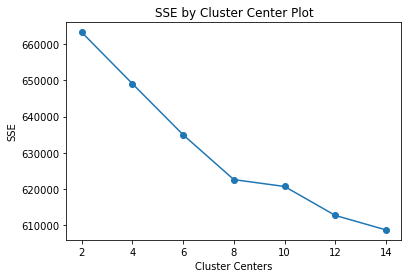

In [53]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(KMeans(n_clusters=k,init='k-means++',max_iter=300,
                          n_init=10,random_state=0,verbose=True).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(countVector, 15)

In [54]:
clusters = KMeans(n_clusters=15,init='k-means++',max_iter=300,n_init=10,random_state=0,verbose=True).fit_predict(countVector)

Initialization complete
Iteration  0, inertia 868344.000
Iteration  1, inertia 648376.963
Iteration  2, inertia 636539.315
Iteration  3, inertia 616642.721
Iteration  4, inertia 615165.668
Iteration  5, inertia 614430.016
Iteration  6, inertia 614180.088
Iteration  7, inertia 614053.518
Iteration  8, inertia 613957.933
Iteration  9, inertia 613409.367
Iteration 10, inertia 613117.853
Iteration 11, inertia 613111.195
Converged at iteration 11: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 824742.000
Iteration  1, inertia 641354.744
Iteration  2, inertia 637653.316
Iteration  3, inertia 635272.635
Iteration  4, inertia 633819.833
Iteration  5, inertia 633635.650
Iteration  6, inertia 633511.662
Iteration  7, inertia 633510.668
Converged at iteration 7: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 815532.000
Iteration  1, inertia 629810.472
Iteration  2, inertia 623219.577
Iter

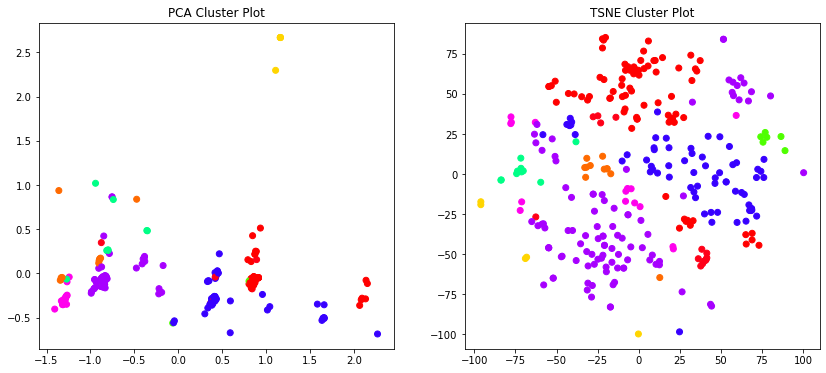

In [55]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=8000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(countVector, clusters)

Initialization complete
Iteration  0, inertia 1343790.000
Iteration  1, inertia 663574.589
Iteration  2, inertia 663277.731
Converged at iteration 2: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 1367952.000
Iteration  1, inertia 664202.442
Iteration  2, inertia 663280.948
Iteration  3, inertia 663277.731
Converged at iteration 3: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 1243476.000
Iteration  1, inertia 663801.618
Iteration  2, inertia 663277.731
Converged at iteration 2: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 1024794.000
Iteration  1, inertia 700573.891
Iteration  2, inertia 700457.040
Iteration  3, inertia 700395.309
Converged at iteration 3: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 1399416.000
Iteration  1, inertia 697656.334
Iteration  2, inert

Iteration  3, inertia 641148.143
Iteration  4, inertia 639567.451
Iteration  5, inertia 639567.292
Converged at iteration 5: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 1026534.000
Iteration  1, inertia 664944.966
Iteration  2, inertia 663500.573
Iteration  3, inertia 657576.449
Iteration  4, inertia 655618.067
Iteration  5, inertia 655596.366
Iteration  6, inertia 655595.743
Converged at iteration 6: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 819528.000
Iteration  1, inertia 669660.991
Iteration  2, inertia 662294.130
Iteration  3, inertia 661323.521
Iteration  4, inertia 661302.783
Converged at iteration 4: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 889350.000
Iteration  1, inertia 684377.423
Iteration  2, inertia 656019.875
Iteration  3, inertia 651375.136
Iteration  4, inertia 651330.283
Iteration  5, inertia

Iteration  0, inertia 1008282.000
Iteration  1, inertia 634810.497
Iteration  2, inertia 633068.269
Iteration  3, inertia 632284.573
Iteration  4, inertia 631754.835
Iteration  5, inertia 630357.245
Iteration  6, inertia 630137.806
Iteration  7, inertia 630131.503
Iteration  8, inertia 630129.892
Converged at iteration 8: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 888012.000
Iteration  1, inertia 666329.124
Iteration  2, inertia 640488.809
Iteration  3, inertia 638806.787
Iteration  4, inertia 638460.288
Iteration  5, inertia 637805.601
Iteration  6, inertia 636857.824
Iteration  7, inertia 635058.700
Iteration  8, inertia 633775.385
Iteration  9, inertia 633232.715
Iteration 10, inertia 633185.968
Iteration 11, inertia 633185.646
Converged at iteration 11: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 801372.000
Iteration  1, inertia 654106.980
Iteration  2, inertia 63831

Iteration  1, inertia 614921.208
Iteration  2, inertia 612901.324
Iteration  3, inertia 610539.975
Iteration  4, inertia 608841.695
Iteration  5, inertia 608740.108
Iteration  6, inertia 608737.123
Iteration  7, inertia 608734.257
Iteration  8, inertia 608733.976
Converged at iteration 8: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 875730.000
Iteration  1, inertia 628798.133
Iteration  2, inertia 622551.044
Iteration  3, inertia 619936.499
Iteration  4, inertia 619899.589
Iteration  5, inertia 619898.214
Converged at iteration 5: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 938280.000
Iteration  1, inertia 620678.655
Iteration  2, inertia 617015.038
Iteration  3, inertia 612589.614
Iteration  4, inertia 611623.216
Iteration  5, inertia 611246.445
Iteration  6, inertia 611232.466
Converged at iteration 6: center shift 0.000000e+00 within tolerance 6.191348e-08
Initializatio

Initialization complete
Iteration  0, inertia 809286.000
Iteration  1, inertia 627042.076
Iteration  2, inertia 623485.288
Iteration  3, inertia 621201.427
Iteration  4, inertia 619788.265
Iteration  5, inertia 619675.940
Iteration  6, inertia 619538.982
Iteration  7, inertia 619442.754
Iteration  8, inertia 619441.758
Converged at iteration 8: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 812898.000
Iteration  1, inertia 628025.998
Iteration  2, inertia 621974.321
Iteration  3, inertia 619588.382
Iteration  4, inertia 616732.231
Iteration  5, inertia 615167.833
Iteration  6, inertia 615137.893
Iteration  7, inertia 614982.148
Iteration  8, inertia 614357.389
Iteration  9, inertia 613849.843
Iteration 10, inertia 612605.998
Iteration 11, inertia 611769.528
Iteration 12, inertia 611760.755
Iteration 13, inertia 611760.468
Converged at iteration 13: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iter

Iteration  4, inertia 616842.774
Iteration  5, inertia 616745.216
Iteration  6, inertia 616506.772
Iteration  7, inertia 615269.006
Iteration  8, inertia 613843.354
Iteration  9, inertia 613274.240
Iteration 10, inertia 612816.700
Iteration 11, inertia 612763.852
Iteration 12, inertia 612762.458
Converged at iteration 12: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 979926.000
Iteration  1, inertia 601673.930
Iteration  2, inertia 594498.051
Iteration  3, inertia 590749.799
Iteration  4, inertia 590441.842
Iteration  5, inertia 590101.670
Iteration  6, inertia 590054.298
Iteration  7, inertia 590053.410
Converged at iteration 7: center shift 0.000000e+00 within tolerance 6.191348e-08
Fit 20 clusters


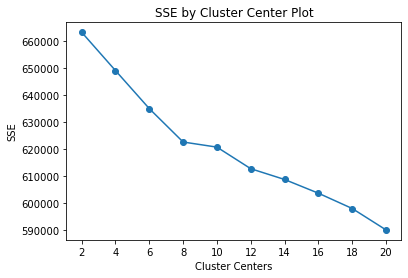

In [56]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(KMeans(n_clusters=k,init='k-means++',max_iter=300,
                          n_init=10,random_state=0,verbose=True).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(countVector, 20)

In [57]:
clusters = KMeans(n_clusters=20,init='k-means++',max_iter=300,n_init=10,random_state=0,verbose=True).fit_predict(countVector)

Initialization complete
Iteration  0, inertia 852906.000
Iteration  1, inertia 635607.769
Iteration  2, inertia 616317.931
Iteration  3, inertia 600016.851
Iteration  4, inertia 598914.700
Iteration  5, inertia 597810.476
Iteration  6, inertia 597350.538
Iteration  7, inertia 597222.239
Iteration  8, inertia 597137.186
Iteration  9, inertia 596697.805
Iteration 10, inertia 596367.949
Iteration 11, inertia 596367.501
Converged at iteration 11: center shift 0.000000e+00 within tolerance 6.191348e-08
Initialization complete
Iteration  0, inertia 803340.000
Iteration  1, inertia 615542.398
Iteration  2, inertia 610871.666
Iteration  3, inertia 608656.732
Iteration  4, inertia 607148.066
Iteration  5, inertia 607008.123
Iteration  6, inertia 606884.835
Iteration  7, inertia 606770.671
Iteration  8, inertia 606671.337
Iteration  9, inertia 605679.102
Iteration 10, inertia 604907.891
Iteration 11, inertia 604902.746
Iteration 12, inertia 604901.589
Converged at iteration 12: center shift 0.00

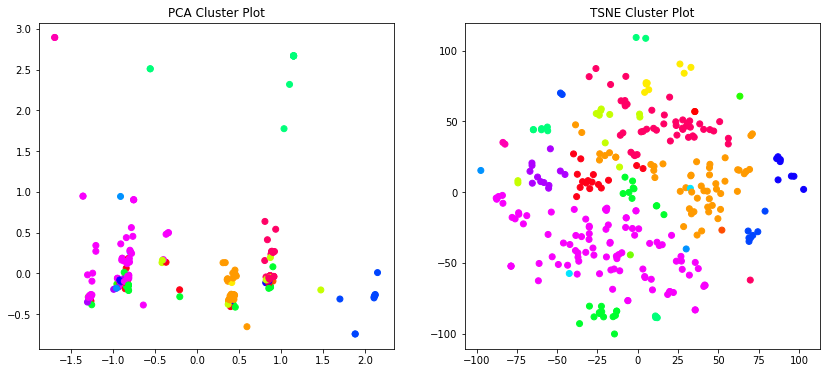

In [58]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=8000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(countVector, clusters)

<p style="font-size: 17px;font-family: Times New Roman">* On remarque qu'à chaque fois et lorsqu'on augmente le nombre de k, on va avoir une visualisation claire de nos données.</p>
<p style="font-size: 17px;font-family: Times New Roman">* En fait, selon le nombre de classe est dépend du nombre du K.</p>
<p style="font-size: 17px;font-family: Times New Roman">* la qualité de clustering augmente forcément quand K augmente.</p>

<div style="font-size: 27px;font-family: Times New Roman;color: #2f8ede"><em><strong>Partie3: Requirement:</strong></em></div>

<p style="font-size: 17px;font-family: Times New Roman">Dependences are fundamental to record the computational enviroment.
Use watermark to print version of python ,ipython, and packages,and characteristics of the computar</p>

In [63]:
pip list

Package                            Version
---------------------------------- -------------------
absl-py                            0.10.0
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 1.9.12
anaconda-project                   0.8.3
argh                               0.26.2
asn1crypto                         1.3.0
astroid                            2.4.2
astropy                            4.0.1.post1
astunparse                         1.6.3
atomicwrites                       1.4.0
attrs                              19.3.0
autopep8                           1.5.3
Babel                              2.8.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.1
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
beautifulsoup4                     4.9.1
bitarray                           1.4.0
bkcharts                    

tweepy                             3.9.0
typing-extensions                  3.7.4.2
ujson                              1.35
unicodecsv                         0.14.1
urllib3                            1.25.9
watchdog                           0.10.3
watermark                          2.0.2
wcwidth                            0.2.5
webencodings                       0.5.1
Werkzeug                           1.0.1
wheel                              0.34.2
widgetsnbextension                 3.5.1
wordcloud                          1.8.1
wrapt                              1.11.2
wurlitzer                          2.0.1
xgboost                            1.2.1
xlrd                               1.2.0
XlsxWriter                         1.2.9
xlwt                               1.3.0
xmltodict                          0.12.0
yapf                               0.30.0
zict                               2.0.0
zipp                               3.1.0
zope.event                         4.4
zope.inter

In [64]:
conda env export > environment.yaml


Note: you may need to restart the kernel to use updated packages.


<div style="font-size: 30px;font-family: Times New Roman;color: #e12eb0"><em><strong>Conclusion Générale</strong></em></div>

<p style="font-size: 17px;font-family: Times New Roman">Le traitement du langage naturel est un vaste domaine et il y a tellement plus à faire sur les données pour obtenir des informations plus précises et utiles. Cela vaut la peine d'être exploré!</p>